In [66]:
from datetime import datetime, timedelta
import time

In [10]:
first_date = datetime(2002,1,1).date()
first_date

datetime.date(2002, 1, 1)

In [13]:
first_date_str = first_date.strftime('%d/%m/%Y')
first_date_str

'01/01/2002'

In [45]:
end_date = datetime(2002,12,31).date()
end_date_str=end_date.strftime('%d/%m/%Y')
end_date_str

'31/12/2002'

In [20]:
delta = timedelta(days=1)
date = first_date + delta
date

datetime.date(2002, 1, 2)

In [17]:
import requests

url = "https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx"

querystring = {"txttungay":"01/01/2002","BacrhID":"1","isEn":"True"}

payload = ""
headers = {"cookie": "f5avraaaaaaaaaaaaaaaa_session_=DMIEJIFEKBDBIIKCJEBFFAMEOHIJEKNOJGMBPOIDFCMKKENACHMAEGIDALDACLKMMIMDENEODHFFFCDKNHDAGAGEGIBKFDGNAFJADBDIDADNEANEDHLIOELOPPPBKKEC; f5_cspm=1234; TS0135ca68=01059058da549241f5b6453c5523ed3fc068043859ba390f0a0851ca539fffb885f381325c9e56a28537456d327c7ea84b9973b0ec1a49ad98c81d550ac556bcfd7cf0e27180d9658dc7dbb36108df2cffdbed42fd"}

response = requests.request("GET", url, data=payload, headers=headers, params=querystring)

print(response.text)



<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head><title>

</title>
    <style type="text/css">
        .tbl-01 th,  .tbl-01 td {
            text-align:center;
            border:1px solid #bdbdbd;
            font-family:Arial;
            font-size:13px;
        }
         .tbl-01 td {
            text-align:right;
            border:1px solid #bdbdbd;
            font-family:Arial;
            font-size:13px;
            
        }
         .tbl-01 {
            width: 80% !important;
            margin: 0 auto !important;
             float: none !important;
         }
		 button#btnRefresh { background-color: #005030  !important; color: #fff  !important; padding: 7px; border-radius: 5px; width: 90px; border: none; }
    </style>
</head>
<body>
 <div style="background: #FFF;  border-radius: 5px 5px; display:flex;">
    
    <table class="tbl-01 rateTable" cells

In [8]:
import pandas as pd
df = pd.read_html(response.text)[0]
df

Currency               Buying Rates           Selling Rates
       Currency Name Currency Code         Cash  Transfer Selling Rates
0   SCHILING AUSTRIA           ATS            -    963.54        977.10
1        AUST.DOLLAR           AUD      7601.64   7655.23       7778.71
2     BELGIAN FRANCE           BEF            -    328.67        333.29
3    CANADIAN DOLLAR           CAD      9326.20   9410.90       9562.68
4       SWISS FRANCE           CHF      8882.92   8945.54       9071.66
5      DEUTSCHE MARK           DEM      6731.55   6779.00       6874.39
6       DANISH KRONE           DKK            -   1778.91       1807.61
7               EURO           EUR     13218.80  13258.58      13445.14
8       FINNISH MARK           FIM            -   2229.93       2261.31
9       FRENCH FRANC           FRF      2007.10   2021.25       2049.69
10     BRITISH POUND           GBP     21568.16  21720.20      22026.42
11   HONGKONG DOLLAR           HKD      1905.56   1918.99       1949.95
12      JAPANESE YEN           JPY       112.68    113.82        115.66
13  SOUTH KOREAN WON           KRW            -     11.37         11.71
14     KUWAITI DINAR           KWD            -  48626.37      49608.73
15      DUTCH GUILDE           NLG            -   6016.48       6101.13
16  NORWEGIAN KRONER           NOK            -   1663.90       1690.74
17     SWEDISH KRONA           SEK            -   1421.26       1444.18
18  SINGAPORE DOLLAR           SGD      8027.33   8083.92       8214.30
19         THAI BAHT           THB       331.47    334.82        348.48
20         US DOLLAR           USD     15060.00  15083.00      15085.00

In [22]:
df.columns

MultiIndex([(     'Currency', 'Currency Name'),
            (     'Currency', 'Currency Code'),
            ( 'Buying Rates',          'Cash'),
            ( 'Buying Rates',      'Transfer'),
            ('Selling Rates', 'Selling Rates')],
           )

In [30]:
df.columns = df.columns.droplevel(level=0)
df.columns

Index(['Currency Name', 'Currency Code', 'Cash', 'Transfer', 'Selling Rates'], dtype='object')

In [39]:
df.rename(columns={'Cash': 'Bid Cash','Transfer':'Bid Transfer', 'Selling Rates':'Ask'},inplace=True)
df['Date']=datetime(2002,1,1).date()
df['Spread']=df['Ask']-df['Bid Transfer']

In [40]:
df

,Currency Name,Currency Code,Bid Cash,Bid Transfer,Ask,Date,Spread
0,SCHILING AUSTRIA,ATS,-,963.54,977.10,2002-01-01,13.56
1,AUST.DOLLAR,AUD,7601.64,7655.23,7778.71,2002-01-01,123.48
2,BELGIAN FRANCE,BEF,-,328.67,333.29,2002-01-01,4.62
3,CANADIAN DOLLAR,CAD,9326.20,9410.90,9562.68,2002-01-01,151.78
4,SWISS FRANCE,CHF,8882.92,8945.54,9071.66,2002-01-01,126.12
5,DEUTSCHE MARK,DEM,6731.55,6779.00,6874.39,2002-01-01,95.39
6,DANISH KRONE,DKK,-,1778.91,1807.61,2002-01-01,28.70
7,EURO,EUR,13218.80,13258.58,13445.14,2002-01-01,186.56
8,FINNISH MARK,FIM,-,2229.93,2261.31,2002-01-01,31.38
9,FRENCH FRANC,FRF,2007.10,2021.25,2049.69,2002-01-01,28.44


In [46]:
date_delta_max = (end_date-first_date).days
date_delta_max

364

In [88]:
date_delta_max =44

In [89]:
first_date = datetime(2002,1,1).date()
VCB_ER_df=pd.DataFrame()

for i in range(date_delta_max):
    next_date = first_date +timedelta(days=i)
    next_date_str = next_date.strftime('%d/%m/%Y')
    url = "https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx"

    querystring = {"txttungay":next_date_str,"BacrhID":"1","isEn":"True"}

    payload = ""
    headers = {"cookie": "f5avraaaaaaaaaaaaaaaa_session_=DMIEJIFEKBDBIIKCJEBFFAMEOHIJEKNOJGMBPOIDFCMKKENACHMAEGIDALDACLKMMIMDENEODHFFFCDKNHDAGAGEGIBKFDGNAFJADBDIDADNEANEDHLIOELOPPPBKKEC; f5_cspm=1234; TS0135ca68=01059058da549241f5b6453c5523ed3fc068043859ba390f0a0851ca539fffb885f381325c9e56a28537456d327c7ea84b9973b0ec1a49ad98c81d550ac556bcfd7cf0e27180d9658dc7dbb36108df2cffdbed42fd"}

    response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
    df = pd.read_html(response.text)[0]
    df.columns = df.columns.droplevel(level=0)
    df.rename(columns={'Cash': 'Bid Cash','Transfer':'Bid Transfer', 'Selling Rates':'Ask'},inplace=True)
    df['Date']=next_date
    df['Spread']=df['Ask']-df['Bid Transfer']
    VCB_ER_df=VCB_ER_df.append(df)
VCB_ER_df

ValueError: No tables found

In [59]:
VCB_ER_df.head(20)

,Currency Name,Currency Code,Bid Cash,Bid Transfer,Ask,Date,Spread
0,AUSTRALIAN DOLLAR,AUD,15459.54,15615.70,16105.12,2022-07-01,489.42
1,CANADIAN DOLLAR,CAD,17589.12,17766.79,18323.64,2022-07-01,556.85
2,SWISS FRANC,CHF,23712.27,23951.79,24702.48,2022-07-01,750.69
3,YUAN RENMINBI,CNY,3407.18,3441.60,3550.00,2022-07-01,108.40
4,DANISH KRONE,DKK,-,3215.58,3336.32,2022-07-01,120.74
5,EURO,EUR,23737.79,23977.57,25045.79,2022-07-01,1068.22
6,POUND STERLING,GBP,27507.86,27785.72,28656.57,2022-07-01,870.85
7,HONGKONG DOLLAR,HKD,2895.02,2924.26,3015.91,2022-07-01,91.65
8,INDIAN RUPEE,INR,-,294.08,305.62,2022-07-01,11.54
9,YEN,JPY,167.24,168.93,176.91,2022-07-01,7.98


In [58]:
VCB_ER_df.tail(20)

,Currency Name,Currency Code,Bid Cash,Bid Transfer,Ask,Date,Spread
0,AUSTRALIAN DOLLAR,AUD,15744.77,15903.81,16416.20,2022-07-20,512.39
1,CANADIAN DOLLAR,CAD,17739.50,17918.69,18496.00,2022-07-20,577.31
2,SWISS FRANC,CHF,23561.11,23799.10,24565.87,2022-07-20,766.77
3,YUAN RENMINBI,CNY,3401.55,3435.91,3547.14,2022-07-20,111.23
4,DANISH KRONE,DKK,-,3163.36,3284.94,2022-07-20,121.58
5,EURO,EUR,23370.72,23606.79,24679.45,2022-07-20,1072.66
6,POUND STERLING,GBP,27409.59,27686.46,28578.47,2022-07-20,892.01
7,HONGKONG DOLLAR,HKD,2907.51,2936.88,3031.50,2022-07-20,94.62
8,INDIAN RUPEE,INR,-,292.46,304.20,2022-07-20,11.74
9,YEN,JPY,164.75,166.42,174.42,2022-07-20,8.00


In [105]:
# first_date = datetime(2022,7,1).date()

def GetVCBExchangeRate(firstdate, enddate):
    
    VCB_ER_df=pd.DataFrame()
    date_delta_interval = (enddate-firstdate).days + 1

    for i in range(date_delta_interval):
#         print(i)
        next_date = first_date +timedelta(days=i)
        next_date_str = next_date.strftime('%d/%m/%Y')
        url = "https://portal.vietcombank.com.vn/UserControls/TVPortal.TyGia/pListTyGia.aspx"

        querystring = {"txttungay":next_date_str,"BacrhID":"1","isEn":"True"}

        payload = ""
        headers = {"cookie": "f5avraaaaaaaaaaaaaaaa_session_=DMIEJIFEKBDBIIKCJEBFFAMEOHIJEKNOJGMBPOIDFCMKKENACHMAEGIDALDACLKMMIMDENEODHFFFCDKNHDAGAGEGIBKFDGNAFJADBDIDADNEANEDHLIOELOPPPBKKEC; f5_cspm=1234; TS0135ca68=01059058da549241f5b6453c5523ed3fc068043859ba390f0a0851ca539fffb885f381325c9e56a28537456d327c7ea84b9973b0ec1a49ad98c81d550ac556bcfd7cf0e27180d9658dc7dbb36108df2cffdbed42fd"}

        response = requests.request("GET", url, data=payload, headers=headers, params=querystring)
        try: 
            df = pd.read_html(response.text)[0]
        except ValueError:
            pass
        else: 
            df.columns = df.columns.droplevel(level=0)
            df.rename(columns={'Cash': 'Bid Cash','Transfer':'Bid Transfer', 'Selling Rates':'Ask'},inplace=True)
            df['Spread']=df['Ask']-df['Bid Transfer']
            df['Date']=next_date
            VCB_ER_df=VCB_ER_df.append(df)

        if i%100 == 0: 
            time.sleep(6)
        else:
            if i%10 == 0: time.sleep(3)
            
    return VCB_ER_df

In [107]:
first_date = datetime(2003,1,1).date()
end_date = datetime(2025,12,31).date()
result = GetVCBExchangeRate(first_date, end_date)
result

ConnectionError: HTTPSConnectionPool(host='portal.vietcombank.com.vn', port=443): Max retries exceeded with url: /UserControls/TVPortal.TyGia/pListTyGia.aspx?txttungay=27%2F07%2F2003&BacrhID=1&isEn=True (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x0000020CFBE9CE88>: Failed to establish a new connection: [WinError 10060] A connection attempt failed because the connected party did not properly respond after a period of time, or established connection failed because connected host has failed to respond'))

In [101]:
result.to_csv('VCB Exchange Rate 2002.csv')

In [94]:
result.Date.unique()

array([datetime.date(2002, 2, 1), datetime.date(2002, 2, 2),
       datetime.date(2002, 2, 3), datetime.date(2002, 2, 4),
       datetime.date(2002, 2, 5), datetime.date(2002, 2, 6),
       datetime.date(2002, 2, 7), datetime.date(2002, 2, 8),
       datetime.date(2002, 2, 9), datetime.date(2002, 2, 10),
       datetime.date(2002, 2, 11), datetime.date(2002, 2, 12),
       datetime.date(2002, 2, 18), datetime.date(2002, 2, 19),
       datetime.date(2002, 2, 20), datetime.date(2002, 2, 21),
       datetime.date(2002, 2, 22), datetime.date(2002, 2, 23),
       datetime.date(2002, 2, 24), datetime.date(2002, 2, 25),
       datetime.date(2002, 2, 26), datetime.date(2002, 2, 27),
       datetime.date(2002, 2, 28)], dtype=object)

In [108]:
result

,Currency Name,Currency Code,Bid Cash,Bid Transfer,Ask,Spread,Date
0,SCHILING AUSTRIA,ATS,-,963.54,977.10,13.56,2002-01-01
1,AUST.DOLLAR,AUD,7601.64,7655.23,7778.71,123.48,2002-01-01
2,BELGIAN FRANCE,BEF,-,328.67,333.29,4.62,2002-01-01
3,CANADIAN DOLLAR,CAD,9326.20,9410.90,9562.68,151.78,2002-01-01
4,SWISS FRANCE,CHF,8882.92,8945.54,9071.66,126.12,2002-01-01
...,...,...,...,...,...,...,...
10,NORWEGIAN KRONER,NOK,-,2196.46,2231.88,35.42,2002-12-31
11,SWEDISH KRONA,SEK,-,1746.57,1774.75,28.18,2002-12-31
12,SINGAPORE DOLLAR,SGD,8754.79,8816.51,8958.71,142.20,2002-12-31
13,THAI BAHT,THB,345.95,349.44,363.70,14.26,2002-12-31


In [113]:
# %%mathplotlibinline

USD_df = result[result['Currency Code']=="USD"]
USD_df

,Currency Name,Currency Code,Bid Cash,Bid Transfer,Ask,Spread,Date
20,US DOLLAR,USD,15060.00,15083.0,15085.0,2.0,2002-01-01
20,US DOLLAR,USD,15060.00,15083.0,15085.0,2.0,2002-01-02
14,US DOLLAR,USD,15065.00,15085.0,15087.0,2.0,2002-01-03
20,US DOLLAR,USD,15065.00,15088.0,15090.0,2.0,2002-01-04
20,US DOLLAR,USD,15065.00,15088.0,15090.0,2.0,2002-01-05
...,...,...,...,...,...,...,...
14,US DOLLAR,USD,15380.00,15397.0,15401.0,4.0,2002-12-27
14,US DOLLAR,USD,15380.00,15397.0,15401.0,4.0,2002-12-28
14,US DOLLAR,USD,15380.00,15397.0,15401.0,4.0,2002-12-29
14,US DOLLAR,USD,15380.00,15402.0,15406.0,4.0,2002-12-30


<function matplotlib.pyplot.show(*args, **kw)>

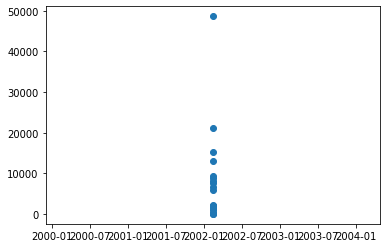

In [120]:
import matplotlib.pyplot as plt
plt.plot_date(df['Date'],df['Bid Transfer'])
plt.show